<h3>Import libraries to use for this project</h3>


In [138]:
import pandas as pd
import sqlite3
import numpy as np
import os
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt

<h2>Data Understanding and Exploration</h2>
1. IMDB database  

In [139]:
#connect to the SQL database
# Define the path to the database file
db_path = r"C:\Users\GICHEHA\Documents\Flatiron\dsc-data-science-env-config\im.db"
conn = sqlite3.connect(db_path)



In [140]:
#view list of tables
query =  "SELECT name FROM sqlite_master WHERE type='table';"
imdb_df = pd.read_sql(query, conn)
imdb_df


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,moviesInfo


In [141]:
#view details of the first table - movie basics
movie_basics_query = "SELECT * FROM movie_basics"
movie_basics_df = pd.read_sql(movie_basics_query, conn)
movie_basics_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [142]:
movie_basics_df.columns
#use the .info method to have a general idea about the dataframe - the columns, their values

movie_basics_df.info

<bound method DataFrame.info of          movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad

movie basic table has 6 column : movie_id	primary_title	original_title	start_year	runtime_minutes	genres

In [143]:
#read the contents of the second table to use for this project - movie ratings
movie_ratings_query = "SELECT * FROM movie_ratings"
movie_ratings_df = pd.read_sql(movie_ratings_query, conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Movie ratings has three columns - movie_id, averagerating, numvotes

# DATA CLEANING


In [144]:
#check to establish if the movie_basic df has any missing values 
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [145]:
#check for missing values in the movies_basics dataframe in percentage
missing_percentage = movie_basics_df.isna().mean() * 100
missing_percentage


movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [146]:
#VISUALLY CHECK FOR NULL VALUES IN THE FIRST TABLE
query = """SELECT * 
              FROM movie_basics 
              WHERE runtime_minutes IS NULL;"""
movie_basics_null = pd.read_sql(query, conn)
movie_basics_null


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,None,"Comedy,Drama"
1,tt0112502,Bigfoot,Bigfoot,2017,None,"Horror,Thriller"
2,tt0139613,O Silêncio,O Silêncio,2012,None,"Documentary,History"
3,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,None,None
4,tt0250404,Godfather,Godfather,2012,None,"Crime,Drama"
...,...,...,...,...,...,...
31734,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,None,Family
31735,tt9916428,The Secret of China,The Secret of China,2019,None,"Adventure,History,War"
31736,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,None,Documentary
31737,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,None,Comedy


In [147]:
len(movie_basics_null)

31739

There are 31,739 rows that have no input/data for the runtime minutes for the movies. 
The number of rows in the table are 146,144, that makes for almost 22% of the total data with missing values. Because the data is more than 20%, it is crucial to explore imputation techniques to fill in the gaps. The imputation technique used for this set is the mean



The genres column has a 3% output which indicates that only 3% of rows in that column have missing data. Because the missing data in this column is less than 5 %, it is considered safe to drop this rowswithou it significantly impacting the analysis


In [148]:
print(missing_percentage[missing_percentage > 0])

original_title      0.014369
runtime_minutes    21.717621
genres              3.700460
dtype: float64


In [149]:
##Fill missing values for columns with more than 20% missing data
movie_basics_cleaned = movie_basics_df.fillna(movie_basics_df.median())
movie_basics_cleaned

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [150]:
#check if there are missing vlaues in the cleaned df
runtime_minutes_null_check = movie_basics_cleaned.isnull().mean() * 100
runtime_minutes_null_check

movie_id           0.000000
primary_title      0.000000
original_title     0.014369
start_year         0.000000
runtime_minutes    0.000000
genres             3.700460
dtype: float64

Once the dataframe has been imputed by using the mean, the dataframe is further cleaned by dropping the rows with missing values. As per the cell above, the output shows that the column named genres has 3.7 % of its values missing. 
Droping the rows makes more sense because the proportion of rows with missing values is very small compared to the overall dataset

In [151]:
movie_basics_clean_df = movie_basics_cleaned.dropna()
movie_basics_clean_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,87.0,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy


In [152]:
#check to see if there are still any missing data
movie_basics_clean_df.isna().sum()


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Initially, there were missing values in the original column title but after dropping the rows with missing vlaues, they were dropped as well. 

In [153]:
#check to see if there are any missing values  
movie_basics_clean_df.isna().sum()


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

<h3>The last datafame called "movie_basics_clean_df" is clean</h3>

##### SAVE THE CLEANED df TO A NEW TABLE IN THE DATABASE. The new table is called moviesInfo.

In [154]:
movie_basics_clean_df.to_sql('moviesInfo',conn, if_exists='replace', index=False) 

# DATAFRAME 2 DATA CLEANING - movie_ratings_df

In [155]:
#check df info
movie_ratings_df.info

<bound method DataFrame.info of          movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]>

In [156]:
#check to see if there are any null values in the df 
movie_ratings_df.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

There are no null values in this dataframe 

# Exploratory Data Analysis
Analyzing the two clean tables - moviesInfo and movie_ratings


<h2>Curious to find out</h2>

<ol> 1. Which movies have the highest and lowest rating?</ol>
<ol> 2. What is the distribution of movie ratings?</ol>
<ol> 3. What is the common movie genre</ol>
<ol> 4. What is the average rating based per each genre?</ol>
<ol> 5. what is the rating distribution of popular genres?</ol>




In [157]:
#join the two dataframes together based group by 
query_movie_info = """SELECT mi.movie_id, mi.primary_title, mi.start_year, mi.genres, mr.averagerating 
                        FROM moviesInfo mi
                        JOIN movie_ratings mr
                        ON mi.movie_id = mr.movie_id
                        GROUP BY genres
                        order by mr.averagerating ;
                        
                    """
joined_movie_df = pd.read_sql(query_movie_info, conn)
joined_movie_df


,movie_id,primary_title,start_year,genres,averagerating
0,tt3437164,Maldito Amor,2014,"Comedy,History,Horror",1.1
1,tt1865374,Futures Past,2012,"Action,Biography,History",1.3
2,tt5161302,Eyal Hirrifah,2015,"Comedy,Musical,Sport",1.4
3,tt0937353,The Devil's Flower,2010,"Mystery,Romance",1.7
4,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9
...,...,...,...,...,...
918,tt5903964,The Long Count Teaser,2016,"History,Sport",9.2
919,tt3856476,Sunakali,2017,"Documentary,Family,Musical",9.3
920,tt4135932,Lost Conquest,2015,"Comedy,Documentary,Fantasy",9.4
921,tt10146728,Foosballers,2019,"Comedy,Documentary,Sport",9.7


#### <ol> 1. Which movies have the highest and lowest rating?</ol>

In [158]:
#top 10 highest rated movies 
top_rated_movies = joined_movie_df.sort_values(by="averagerating", ascending=False).head(10)
top_rated_movies[['primary_title','genres','averagerating']]


,primary_title,genres,averagerating
922,Love on a Leash,"Documentary,Family,Romance",9.7
921,Foosballers,"Comedy,Documentary,Sport",9.7
920,Lost Conquest,"Comedy,Documentary,Fantasy",9.4
919,Sunakali,"Documentary,Family,Musical",9.3
918,The Long Count Teaser,"History,Sport",9.2
917,Ratne Price Sa Kosara,"Documentary,History,War",9.2
916,Los días de Ayotzinapa (The 43s),"Crime,Documentary,Drama",9.2
915,Sweet Science,"Action,Documentary,Sport",9.2
914,Road to Pride,"Comedy,Documentary,Romance",9.1
913,Blood Army,War,9.0


In [159]:
#top 10 lowest rated movies
lowest_rated_movies = joined_movie_df.sort_values(by='averagerating').head(10)
lowest_rated_movies[['primary_title', 'genres', 'averagerating']]

,primary_title,genres,averagerating
0,Maldito Amor,"Comedy,History,Horror",1.1
1,Futures Past,"Action,Biography,History",1.3
2,Eyal Hirrifah,"Comedy,Musical,Sport",1.4
3,The Devil's Flower,"Mystery,Romance",1.7
4,Foodfight!,"Action,Animation,Comedy",1.9
5,The Hospital 2,"Adult,Horror",2.0
6,Battle Earth,"Action,Sci-Fi,War",2.1
7,Fahr zur Hölle,"Action,Mystery",2.2
8,Ladies Mafia,"Adventure,Crime,Romance",2.3
9,The Broken Key,"History,Sci-Fi,Thriller",2.3


### 2. Distribution of movie ratings.

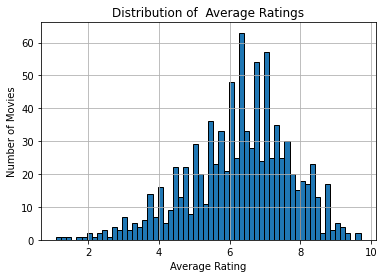

In [160]:
joined_movie_df['averagerating'].hist(bins=60, edgecolor="black")
plt.title("Distribution of  Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()

Most of the movie ratings in the IMDB database have an average rating of 6 out of 10  

what is the mode of the ratings in the database


In [161]:
joined_movie_df['averagerating'].mode()

0    6.4
dtype: float64

In [162]:
#most movies in the IMDB DB have an average rating of 6.4

### 3. Most common genres


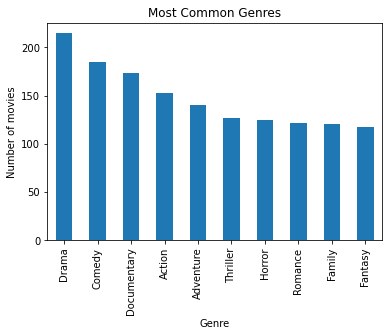

In [163]:
#split the genres column and make it into separate rows
df_genres = joined_movie_df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_genres.name = 'genre'
genre_counts = df_genres.value_counts()


# check how many counts there are 
len(genre_counts) #there are 26 genre counts

#plot the bar of the most common genres
genre_counts.head(10).plot(kind='bar')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

### 4. What is the average rating based per each genre?

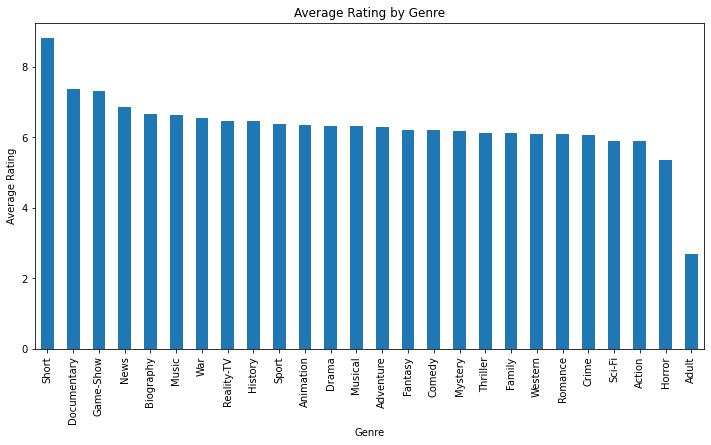

In [165]:
#merge the genres back into the original dataframe 
expanded_joined_df = joined_movie_df.drop('genres', axis=1).join(df_genres)

# Compute the average rating per genre
avg_rating_per_genre = expanded_joined_df.groupby('genre')['averagerating'].mean().sort_values(ascending=False)


#bar plot
avg_rating_per_genre.plot(kind='bar',figsize=(12,6))
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

### 5. Rating distribution for popular Genres

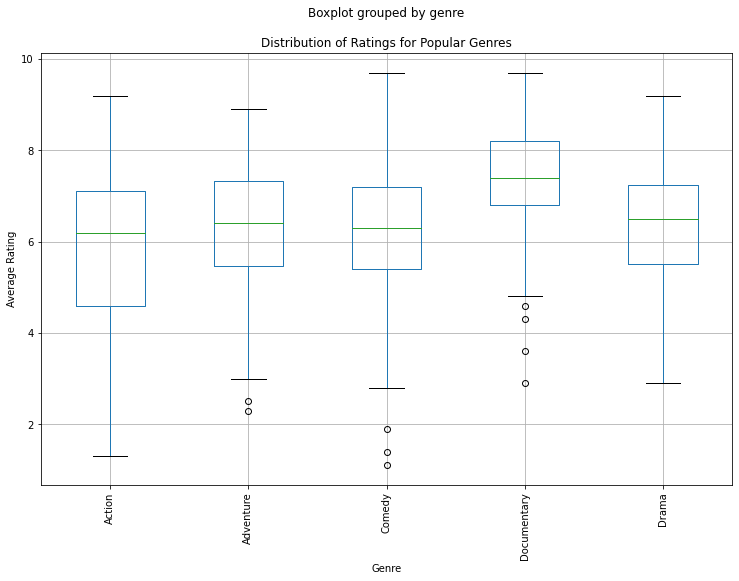

In [167]:
popular_genres = genre_counts.head(5).index

df_popular_genres = expanded_joined_df[expanded_joined_df['genre'].isin(popular_genres)]

# Box plot of ratings for popular genres
df_popular_genres.boxplot(column='averagerating', by='genre', figsize=(12, 8), rot=90)
plt.title('Distribution of Ratings for Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()